# Momento de Retroalimentación: Reto Limpieza del Conjunto de Datos


| Nombre                              | Matrícula  |
|-------------------------------------|------------|
| Fernando Bustos Monsiváis           | A00829931  |
| Ramón Yuri Danzos García            | A00227838  |
| Axel Amós Hernández Cárdenas        | A00829837  |
| Josué Emmanuel Flores Mendoza       | A00833132  |
| Jesus Daniel Martínez García        | A00833591  |

<br/>

* Documento: https://docs.google.com/document/d/1a89uiaOc5vBmqv9YwrxeHoDOxDb7VsAqLn0I8rkbgXU/edit?usp=sharing

### 1. Introducción
El hundimiento del Titanic es una de las catástrofes marítimas más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el Titanic, considerado por muchos como inhundible, colapsó al colisionar con un iceberg. Desafortunadamente, de los 2 224 pasajeros que se encontraban en la embarcación, solamente sobrevivieron 772 a causa de la falta de botes salvavidas en la embarcación (Cukierski, 2012).

Aunque la suerte siempre es un aspecto a considerar en una situación de vida o muerte, en el caso del Titanic pareciera ser que algunos grupos de personas tenían mejores probabilidades de sobrevivir que otras. Debido a lo anterior, es de interés analizar y determinar, a partir de datos de pasajeros, qué tipo de personas tenían más oportunidades de sobrevivir.

### 2. Objetivo
El objetivo de este jupyter notebook es abordar el proceso de preprocesamiento de datos de una forma manual mientras se sigue el esquema de Extract, Transform & Load (ETL) para encontrar las features clave que podrían influir en la supervivencia de los pasajeros. Realizado lo anterior, se espera que el dataset resultante sea lo suficientemente bueno y que las features utilizadas contengan datos consistentes y de buena calidad para que posteriormente se pueda generar un modelo de predicción más preciso, robusto y funcional.



# Conectarse a Google Drive

In [1]:
# Import drive to connect and interact with Google Drive (so we can import the data)
# Note: This may take a while, but remember to give permission
from google.colab import drive

drive.mount("/content/gdrive")
!pwd # Print working directory

Mounted at /content/gdrive
/content


In [2]:
# Navigate to the path where the dataset is stored and read the csv file
%cd "/content/gdrive/MyDrive/Actividades IA avanzada/Reto"
!ls # List files located in defined folder

/content/gdrive/MyDrive/Actividades IA avanzada/Reto
train_cleaned.csv  train.csv  train_filled.csv


# Cargar Dataset

### 1. Dataset Inicial



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

El dataset inicial, por nombre de archivo “train.csv”, contiene un total de 891 instancias las cuales están definidas por un total de 12 features. En la siguiente tabla se muestran los features, su tipo de dato y una pequeña descripción de lo que representa en el dataset:

<br/>

| Feature     | Descripción                                                                 | Tipo de Dato |
|-------------|------------------------------------------------------------------------------|--------------|
| passengerId | ID del pasajero                                                              | Int64        |
| survived    | Muestra si el pasajero sobrevivió (1) o no sobrevivió (0)                   | Int64        |
| pclass      | Muestra la clase a la que pertenece el ticket: 1 = 1st, 2 = 2nd, 3 = 3rd    | Int64        |
| name        | Muestra el nombre del pasajero                                               | str          |
| sex         | Muestra el sexo del pasajero                                                 | str          |
| age         | Muestra la edad del pasajero                                                 | float64      |
| sibsp       | Muestra el número de hermanos/esposas en la embarcación                      | Int64        |
| parch       | Muestra el número de padres/hijos en la embarcación                          | Int64        |
| ticket      | Muestra el número del ticket del pasajero                                    | str          |
| fare        | Muestra la tarifa que pagó el pasajero para abordar la embarcación           | float64      |
| cabin       | Muestra el número de cabina del pasajero                                     | float        |
| embarked    | Muestra el puerto de embarque del pasajero                                   | str          |

<br/>
Después de haber identificado las características del dataset, su descripción y tipo de dato, es pertinente proceder a evaluar la calidad y completitud de los datos. Esto implica realizar un análisis para detectar la presencia de datos faltantes, o inconsistencias que puedan afectar el rendimiento de los modelos que posteriormente se implementarían.

#### Grafico de barras de datos faltantes

891


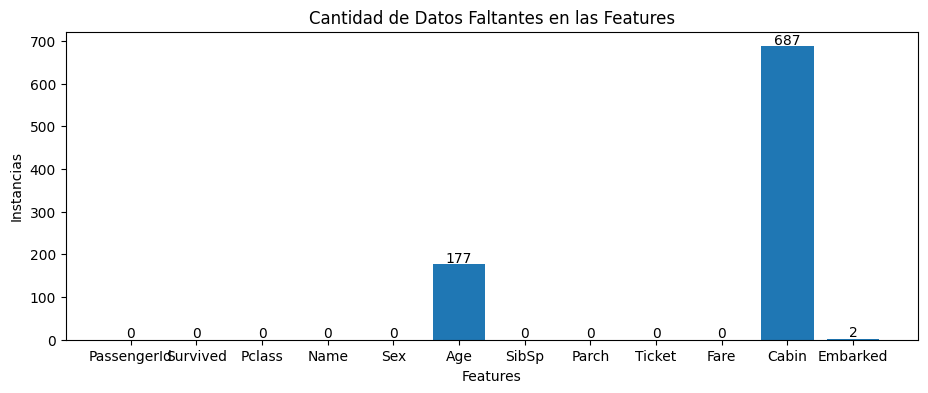

In [5]:
# CALCULAR CANTIDAD DE FILAS = NÚMERO DE INSTANCIAS
totalFilasDf = len(df)
print(totalFilasDf)
# 1. CALCULAR LA CANTIDAD DE DATOS FALTANTES POR COLUMNA

faltantesPorColumna = df.isnull().sum()
fig = plt.figure(figsize=(11,4))

plt.bar(df.columns, faltantesPorColumna)
plt.title('Cantidad de Datos Faltantes en las Features')
plt.xlabel("Features")
plt.ylabel("Instancias")

for i, value in enumerate(faltantesPorColumna):
    plt.text(i, value + 5, str(value), ha='center')

plt.show()


Como se puede observar, los únicos features que presentan datos faltantes son los de Age, Cabin y Embarked. A continuación, se presenta una sección de código y una tabla que detalla el número y porcentaje de datos faltantes para cada uno de los features mencionados:


In [6]:
# Calcular la cantidad de filas
total_filas = len(df)

# Calcular la cantidad y proporción de datos faltantes por columna
faltantes_por_columna = df.isnull().sum()
proporcion_faltantes_por_columna = df.isnull().mean()

# Mostrar resultados
for columna in df.columns:
    faltantes = faltantes_por_columna[columna]
    proporcion = proporcion_faltantes_por_columna[columna]
    if faltantes > 0:
      print(f"Columna: {columna}")
      print(f"  - Cantidad de datos faltantes: {faltantes}")
      print(f"  - Proporción de datos faltantes: {proporcion:.2%}")
      print()

Columna: Age
  - Cantidad de datos faltantes: 177
  - Proporción de datos faltantes: 19.87%

Columna: Cabin
  - Cantidad de datos faltantes: 687
  - Proporción de datos faltantes: 77.10%

Columna: Embarked
  - Cantidad de datos faltantes: 2
  - Proporción de datos faltantes: 0.22%



| Feature  | Número de Datos Faltantes | Porcentaje de Datos Faltantes |
|----------|---------------------------|-------------------------------|
| age      | 177                       | 19.87%                        |
| cabin    | 687                       | 77.10%                        |
| embarked | 2                         | 0.22%                         |

En síntesis, el análisis preliminar del dataset ha proporcionado una visión detallada de las características del mismo, sentando las bases para las decisiones que se tomarán en la siguiente sección: la limpieza de datos.



### 4. Decisiones Tomadas

#### 4.1 Cabin

Como se vió anteriormente, el feature de cabin presenta un total de 697 valores faltantes, valor que que representa el 77% del total de instancias. Esta alta proporción de datos faltantes dificulta la identificación de patrones confiables para imputar datos, lo que podría introducir ruido en el modelo. Aunque, teóricamente, esta variable podría estar relacionada con la supervivencia debido a la ubicación de la cabina en el barco, el alto nivel de datos faltantes hace que esta información sea poco confiable. Además, la probabilidad de supervivencia también puede ser reflejada en otras variables con datos más completos. Por estas razones, eliminar la columna Cabin fue la mejor decisión para evitar comprometer la calidad del modelo.

In [7]:
df = df.drop("Cabin", axis=1)

#### 4.2 Name para determinar Age

La variable de edad presenta un total de 177 datos faltantes, representando casi un 20% del total de las instancias y eliminarlas puede convertirse en un problema. Como esta feature se considera relevante, se decidió utilizar una estrategia basada en calcular la edad con en los títulos de las personas. La metodología de extracción se describe a continuación:

1. Se agrupan a los pasajeros según su título al mismo tiempo que se intenta observar un patrón relacionado a sus edades. Por ejemplo, títulos como Master corresponden a pasajeros jóvenes, mientras que Mr. o Mrs. con adultos. De esta forma, se comienza a formar un patrón en el rango de edades a simple vista. Para títulos que también representan adultos (Dr., Rev., Mlle., Major, Col., Countess, Capt., Ms., Sir., Lady, Mme., Don, Jonkheer) se decidió incluirlos en títulos como Mr. y Ms., ya que comparten las características de edad similares y se pretende evitar crear grupos con pocos datos.

2. Una vez que se tiene a los pasajeros agrupados por título, se calcula el promedio y la desviación estándar de la edad para cada grupo. Estos valores proporcionarán una idea del rango típico de edades para cada título. De esta manera, se logra una imputación con el rango basado en la desviación estándar en lugar de imputar un valor exacto del promedio y bajo la idea de generar valores random dentro de este rango con el fin de mantener una distribución natural de las edades según los títulos.


In [8]:
# Encontrar los títulos
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Contar cuántos hay de cada título
title_counts = df['Title'].value_counts()

print(title_counts)

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


#### 4.3 Embarked

El feature de embarked sólo cuenta con dos datos faltantes, que representan el 0.22% de las instancias, por lo que se optó analizar más delante si el feature tenía potencial de formar parte del dataset resultante.

In [9]:
# Contar cuántos hay de cada ciudad de embarque
"""
S = Southampton (0)
C = Cherbourg (1)
Q = Queenstown (2)
"""

embarked_counts = df['Embarked'].value_counts()
embarked_counts

,count
Embarked,
S,644
C,168
Q,77


# Mapeo de valores (limpieza de valores categóricos)

In [10]:
# Mapear 'male' a 1 y 'female' a 0
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q':2})

In [11]:
# Mapear títulos a valores
title_mapping = {
    'Mr': 1,
    'Mrs': 2,
    'Miss': 3,
    'Master': 4,
    'Dr': 1,
    'Rev': 1,
    'Mlle': 3,
    'Major': 1,
    'Col': 1,
    'Countess': 3,
    'Capt': 1,
    'Ms': 3,
    'Sir': 1,
    'Lady': 3,
    'Mme': 3,
    'Don': 1,
    'Jonkheer': 1
}

df['TitleNumber'] = df['Title'].map(title_mapping)

print(df[['Name', 'Title', 'TitleNumber']].head())

                                                Name Title  TitleNumber
0                            Braund, Mr. Owen Harris    Mr            1
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs            2
2                             Heikkinen, Miss. Laina  Miss            3
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs            2
4                           Allen, Mr. William Henry    Mr            1


In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,TitleNumber
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,Miss,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0.0,Rev,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0.0,Miss,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,0.0,Miss,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1.0,Mr,1


# Comparar relación Features/Label

Comparar las relaciones que existe entre los features con el label para analizar si son significativamente relevantes para poder predecir un resultado.

## Age/Survived


La edad de los pasajeros es un dato relevante para el análisis del problema, ya que ésta está altamente relacionada a la supervivencia. El siguiente gráfico muestra el número de supervivientes y no supervivientes agrupados por un rango de edad, con el fin de encontrar una correlación entre estos para apoyar al modelo con este patrón.

<ipython-input-13-730f2af53b59>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survived = df.groupby(['AgeRange', 'Survived']).size().unstack(fill_value=0)


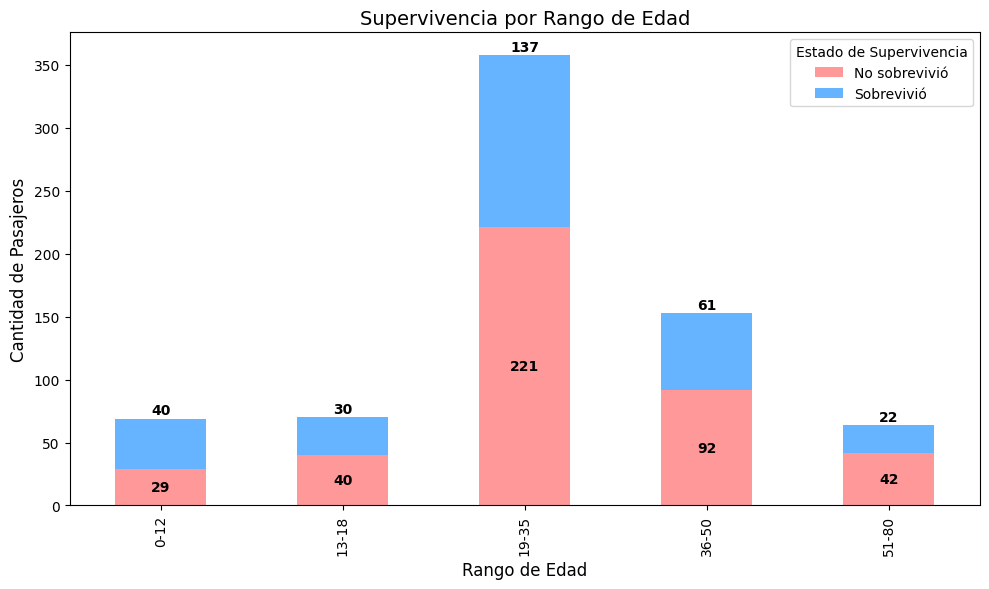

Tabla de comparación entre 'AgeRange' y 'Survived':
Survived    0    1  % Not Survived  % Survived
AgeRange                                      
0-12       29   40            42.0        58.0
13-18      40   30            57.1        42.9
19-35     221  137            61.7        38.3
36-50      92   61            60.1        39.9
51-80      42   22            65.6        34.4


In [13]:
# Agrupamos por 'AgeRange' y 'Survived' para contar los valores en el DataFrame

df['AgeRange'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 50, 80], labels=['0-12', '13-18', '19-35', '36-50', '51-80'])

age_survived = df.groupby(['AgeRange', 'Survived']).size().unstack(fill_value=0)

# Calcula el total de personas para cada rango de edad
total_age = age_survived.sum(axis=1)

# Calcula el porcentaje de supervivencia y no supervivencia
age_survived['% Not Survived'] = (age_survived[0] / total_age * 100).round(1)
age_survived['% Survived'] = (age_survived[1] / total_age * 100).round(1)

# Crea el gráfico de barras apiladas para mostrar la supervivencia por rango de edad
ax = age_survived[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])

# Configura el título y las etiquetas
plt.title('Supervivencia por Rango de Edad', fontsize=14)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)
plt.legend(['No sobrevivió', 'Sobrevivió'], title='Estado de Supervivencia')

# Añade las etiquetas con las cantidades sobre cada barra, excepto cuando el valor es 0
for p in ax.patches:
    height = p.get_height()

    if height > 0:  # Solo añade la anotación si el valor es mayor que 0
        width = p.get_width()
        x, y = p.get_xy()

        if y > 0:
            ax.annotate(f'{int(height)}', (x + width / 2, y + height + 1),
                        ha='center', va='bottom', fontsize=10, color='black', weight='bold')
        else:
            ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2),
                        ha='center', va='center', fontsize=10, color='black', weight='bold')

# Muestra el gráfico
plt.tight_layout()
plt.show()

# Imprimir los valores en una tabla
print("Tabla de comparación entre 'AgeRange' y 'Survived':")
print(age_survived)


## SibSp/Survived



Con el fin de determinar si esta feature sería de utilidad para predecir la supervivencia de una persona a bordo del Titanic, se realizó una gráfica de correlación entre SibSp y Survived, donde se encontró una serie de relaciones interesantes entre diferentes datos. Lo anterior permitió establecer patrones de supervivencia con base en la cantidad de hermanos/cónyuges a bordo.

A partir de lo anterior, se realizaron varios gráficos de pastel para comparar cada valor del feature "SibSp" con el label "Survived" buscando una correlación entre estos para apoyar al modelo con este patrón.

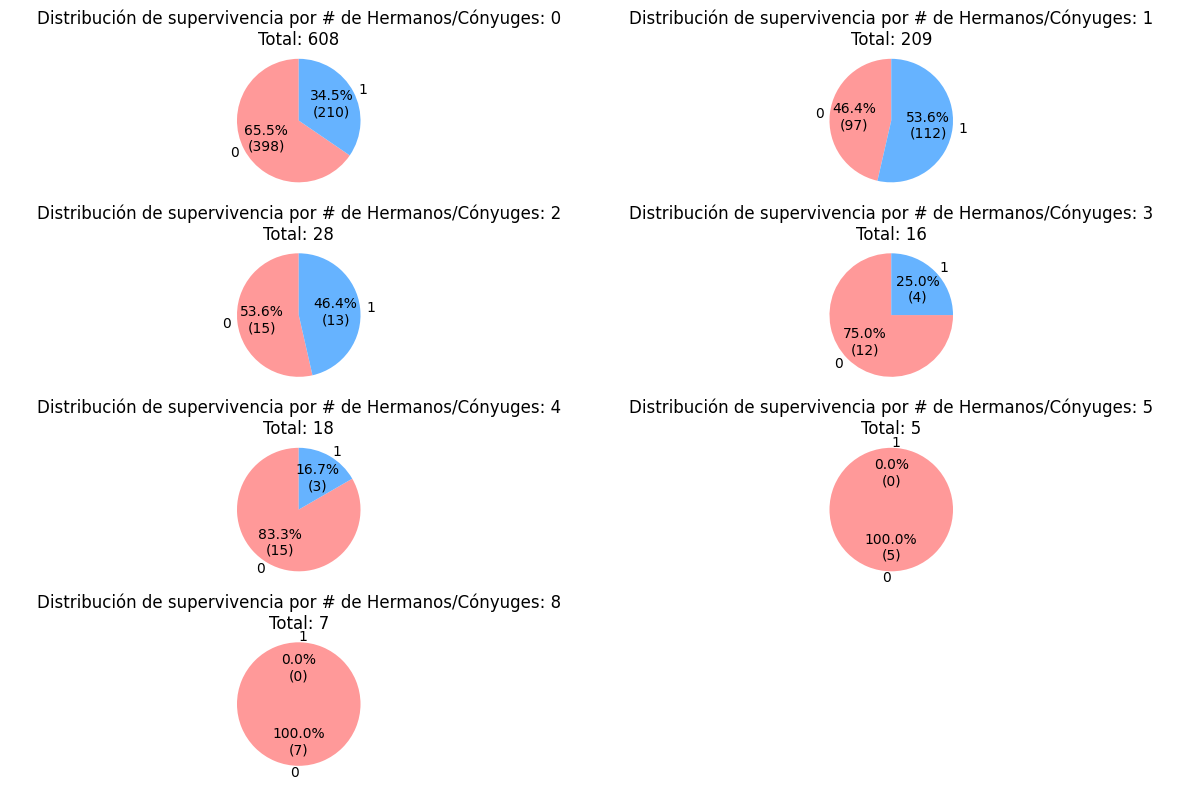

In [14]:
# Agrupamos por 'SibSp' y 'Survived' para contar los valores
sibsp_survived = df.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)

# Función para agregar porcentaje y cantidad
def func(pct, allvalues):
    absolute = int(round(pct/100.*sum(allvalues)))
    return f"{pct:.1f}%\n({absolute})"

# Configuramos el número de columnas y filas
num_ports = len(sibsp_survived.index)
fig, axes = plt.subplots(nrows=(num_ports + 1) // 2, ncols=2, figsize=(12, 8))

# Aplanamos la matriz de ejes para iterar fácilmente
axes = axes.flatten()

# Hacemos la gráfica de pie para cada número de herman@s/cónyuge
for i, port in enumerate(sibsp_survived.index):
    values = sibsp_survived.loc[port]
    if values.sum() > 0:  # Verifica que haya datos para graficar
        axes[i].pie(values,
                labels=values.index,
                autopct=lambda pct: func(pct, values),
                startangle=90,
                colors=['#ff9999', '#66b3ff'])
        total = values.sum()
        axes[i].set_title(f'Distribución de supervivencia por # de Hermanos/Cónyuges: {port}\nTotal: {total}')
        axes[i].axis('equal')
    else:
        axes[i].set_visible(False)  # Oculta el subplot si no hay datos

# Elimina gráficos no utilizados si el número de puertos es impar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---
Gráfico de barras para comparar cada valor del feature "SibSp" con el label "Survived" aplicado sólo a hombres.

Se encontró una correlación entre el feature "SibSp" y el label "Survived", por lo que se comparan ahora estos dos elementos sólo con los hombres del feature "Sex" para comprobar que este patrón no está reflejando en realidad uno ya encontrado, en otras palabras, se quiere comprobar que el patrón sea por el número de hermanos/cónyuges y no por el hecho de ser hombres.

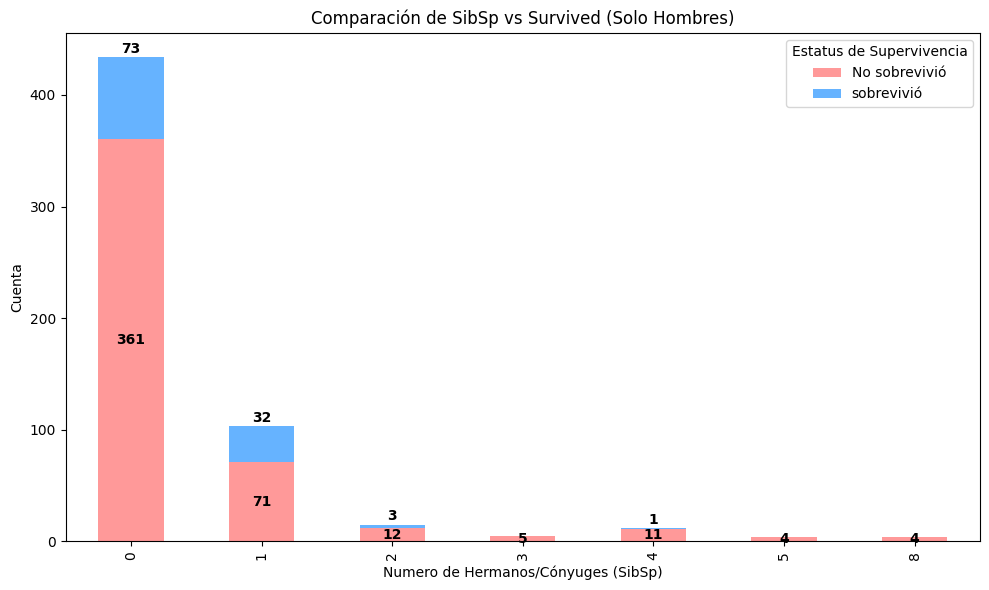

Tabla de comparación entre 'SibSp' y 'Survived' (solo hombres):
Survived    0   1  % Not Survived  % Survived
SibSp                                        
0         361  73            83.2        16.8
1          71  32            68.9        31.1
2          12   3            80.0        20.0
3           5   0           100.0         0.0
4          11   1            91.7         8.3
5           4   0           100.0         0.0
8           4   0           100.0         0.0


In [15]:
# Filtra solo a los hombres
df_men = df[df['Sex'] == 1]

# Agrupa por 'SibSp' y 'Survived' para contar los valores en el DataFrame filtrado
sibsp_survived_men = df_men.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)

# Calcula el total de hombres para cada valor de 'SibSp'
total_sibsp = sibsp_survived_men.sum(axis=1)

# Calcula el porcentaje de supervivencia y no supervivencia
sibsp_survived_men['% Not Survived'] = (sibsp_survived_men[0] / total_sibsp * 100).round(1)
sibsp_survived_men['% Survived'] = (sibsp_survived_men[1] / total_sibsp * 100).round(1)

# Crea el gráfico de barras
ax = sibsp_survived_men[[0,1]].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])

# Configura el título y las etiquetas
plt.title('Comparación de SibSp vs Survived (Solo Hombres)')
plt.xlabel('Numero de Hermanos/Cónyuges (SibSp)')
plt.ylabel('Cuenta')
plt.legend(['No sobrevivió', 'sobrevivió'], title='Estatus de Supervivencia')

# Añade las etiquetas con las cantidades sobre cada barra, excepto cuando el valor es 0
for p in ax.patches:
    height = p.get_height()

    if height > 0:  # Solo añade la anotación si el valor es mayor que 0
        width = p.get_width()
        x, y = p.get_xy()

        if y > 0:
            ax.annotate(f'{int(height)}', (x + width / 2, y + height + 1),
                        ha='center', va='bottom', fontsize=10, color='black', weight='bold')
        else:
            ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2),
                        ha='center', va='center', fontsize=10, color='black', weight='bold')

# Muestra el gráfico
plt.tight_layout()
plt.show()

# Imprimir los valores en una tabla
print("Tabla de comparación entre 'SibSp' y 'Survived' (solo hombres):")
print(sibsp_survived_men)

---
Gráfico de barras para comparar cada valor del feature "SibSp" con el label "Survived" aplicado sólo a mujeres.

En el siguiente gráfico se busca lo mismo que en el anterior, pero ahora aplicado para las mujeres.

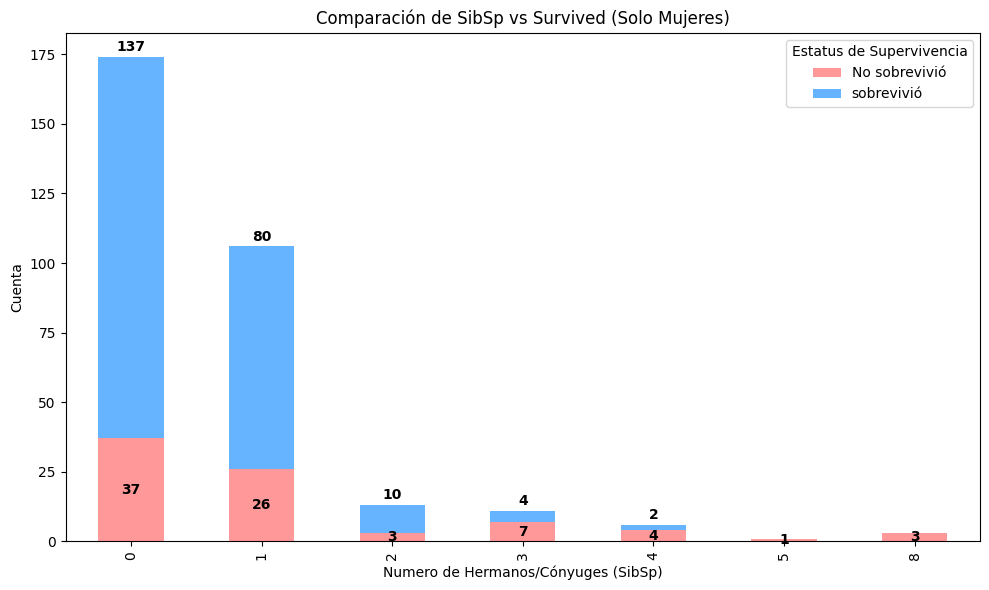

Tabla de comparación entre 'SibSp' y 'Survived' (solo mujeres):
Survived   0    1  % Not Survived  % Survived
SibSp                                        
0         37  137            21.3        78.7
1         26   80            24.5        75.5
2          3   10            23.1        76.9
3          7    4            63.6        36.4
4          4    2            66.7        33.3
5          1    0           100.0         0.0
8          3    0           100.0         0.0


In [16]:
# Filtra solo a las mujeres
df_women = df[df['Sex'] == 0]

# Agrupa por 'SibSp' y 'Survived' para contar los valores en el DataFrame filtrado
sibsp_survived_women = df_women.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)

# Calcula el total de mujeres para cada valor de 'SibSp'
total_sibsp = sibsp_survived_women.sum(axis=1)

# Calcula el porcentaje de supervivencia y no supervivencia
sibsp_survived_women['% Not Survived'] = (sibsp_survived_women[0] / total_sibsp * 100).round(1)
sibsp_survived_women['% Survived'] = (sibsp_survived_women[1] / total_sibsp * 100).round(1)

# Crea el gráfico de barras
ax = sibsp_survived_women[[0,1]].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])

# Configura el título y las etiquetas
plt.title('Comparación de SibSp vs Survived (Solo Mujeres)')
plt.xlabel('Numero de Hermanos/Cónyuges (SibSp)')
plt.ylabel('Cuenta')
plt.legend(['No sobrevivió', 'sobrevivió'], title='Estatus de Supervivencia')


# Añade las etiquetas con las cantidades sobre cada barra, excepto cuando el valor es 0
for p in ax.patches:
    height = p.get_height()

    if height > 0:  # Solo añade la anotación si el valor es mayor que 0
        width = p.get_width()
        x, y = p.get_xy()

        if y > 0:
            ax.annotate(f'{int(height)}', (x + width / 2, y + height + 1),
                        ha='center', va='bottom', fontsize=10, color='black', weight='bold')
        else:
            ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2),
                        ha='center', va='center', fontsize=10, color='black', weight='bold')

# Muestra el gráfico
plt.tight_layout()
plt.show()

# Imprimir los valores en una tabla
print("Tabla de comparación entre 'SibSp' y 'Survived' (solo mujeres):")
print(sibsp_survived_women)

## Parch/Survived

Para determinar si la feature de Parch sería de utilidad para predecir la supervivencia de una persona a bordo del Titanic, se realizó, una vez más, una gráfica de correlación entre Parch y Survived. Se encontró una serie de relaciones interesantes entre diferentes datos, permitiendo encontrar patrones de supervivencia en base a la cantidad de hijos/padres a bordo.

A partir de lo anterior, se realizaron varios gráficos de pastel para comparar cada valor del feature "Parch" con el label "Survived" buscando una correlación entre estos para apoyar al modelo con este patrón.

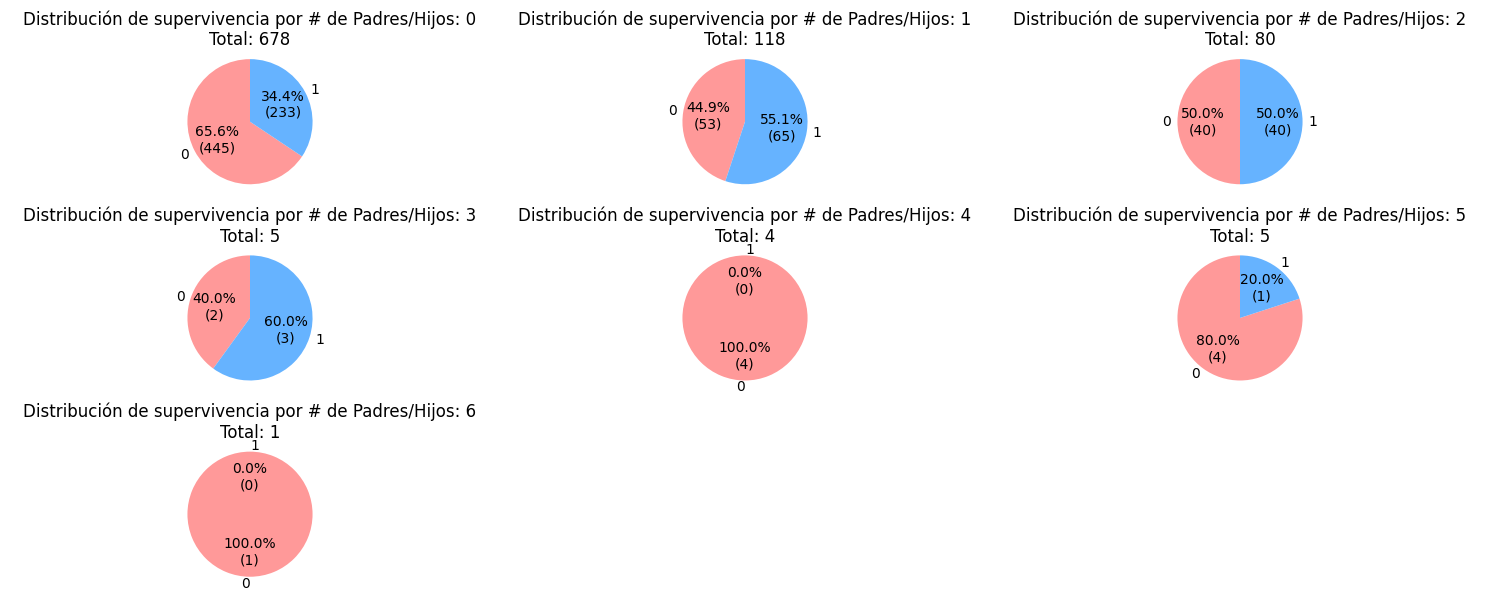

In [17]:
# Agrupamos por 'Parch' y 'Survived' para contar los valores
parch_survived = df.groupby(['Parch', 'Survived']).size().unstack(fill_value=0)

# Función para agregar porcentaje y cantidad
def func(pct, allvalues):
    absolute = int(round(pct/100.*sum(allvalues)))
    return f"{pct:.1f}%\n({absolute})"

# Configuramos el número de columnas y filas
num_ports = len(parch_survived.index)
fig, axes = plt.subplots(nrows=(num_ports + 1) // 2, ncols=3, figsize=(15, 8))

# Aplanamos la matriz de ejes para iterar fácilmente
axes = axes.flatten()

# Hacemos la gráfica de pie para cada número de padres/hijos
for i, port in enumerate(parch_survived.index):
    values = parch_survived.loc[port]
    if values.sum() > 0:  # Verifica que haya datos para graficar
        axes[i].pie(values,
                labels=values.index,
                autopct=lambda pct: func(pct, values),
                startangle=90,
                colors=['#ff9999', '#66b3ff'])
        total = values.sum()
        axes[i].set_title(f'Distribución de supervivencia por # de Padres/Hijos: {port}\nTotal: {total}')
        axes[i].axis('equal')
    else:
        axes[i].set_visible(False)  # Oculta el subplot si no hay datos

# Elimina gráficos no utilizados si el número de puertos es impar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---
Gráfico de barras para comparar cada valor del feature "Parch" con el label "Survived" aplicado sólo a hombres.

Se encontró una correlación entre el feature "Parch" y el label "Survived", por lo que comparamos ahora estos dos elementos solo con los hombres del feature "Sex" para comprobar que este patrón no está reflejando en realidad uno ya encontrado, en otras palabras queremos comprobar que el patrón sea por el número de padres/hijos y no por el hecho de ser hombres.

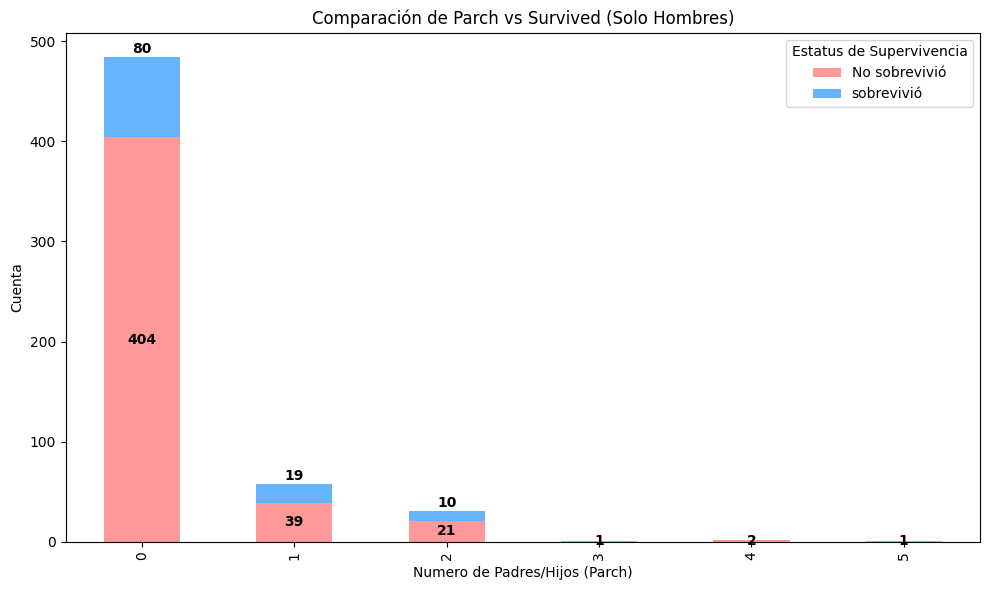

Tabla de comparación entre 'parch' y 'Survived' (solo hombres):
Survived    0   1  % Not Survived  % Survived
Parch                                        
0         404  80            83.5        16.5
1          39  19            67.2        32.8
2          21  10            67.7        32.3
3           1   0           100.0         0.0
4           2   0           100.0         0.0
5           1   0           100.0         0.0


In [18]:
# Filtra solo a los hombres
df_men = df[df['Sex'] == 1]

# Agrupa por 'Parch' y 'Survived' para contar los valores en el DataFrame filtrado
parch_survived_men = df_men.groupby(['Parch', 'Survived']).size().unstack(fill_value=0)

# Calcula el total de hombres para cada valor de 'Parch'
total_parch = parch_survived_men.sum(axis=1)

# Calcula el porcentaje de supervivencia y no supervivencia
parch_survived_men['% Not Survived'] = (parch_survived_men[0] / total_parch * 100).round(1)
parch_survived_men['% Survived'] = (parch_survived_men[1] / total_parch * 100).round(1)

# Crea el gráfico de barras
ax = parch_survived_men[[0,1]].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])

# Configura el título y las etiquetas
plt.title('Comparación de Parch vs Survived (Solo Hombres)')
plt.xlabel('Numero de Padres/Hijos (Parch)')
plt.ylabel('Cuenta')
plt.legend(['No sobrevivió', 'sobrevivió'], title='Estatus de Supervivencia')

# Añade las etiquetas con las cantidades sobre cada barra, excepto cuando el valor es 0
for p in ax.patches:
    height = p.get_height()

    if height > 0:  # Solo añade la anotación si el valor es mayor que 0
        width = p.get_width()
        x, y = p.get_xy()

        if y > 0:
            ax.annotate(f'{int(height)}', (x + width / 2, y + height + 1),
                        ha='center', va='bottom', fontsize=10, color='black', weight='bold')
        else:
            ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2),
                        ha='center', va='center', fontsize=10, color='black', weight='bold')

# Muestra el gráfico
plt.tight_layout()
plt.show()

# Imprimir los valores en una tabla
print("Tabla de comparación entre 'parch' y 'Survived' (solo hombres):")
print(parch_survived_men)

---
Gráfico de barras para comparar cada valor del feature "Parch" con el label "Survived" aplicado sólo a mujeres.

En el siguiente gráfico se busca lo mismo que en el anterior, pero ahora aplicado para las mujeres.

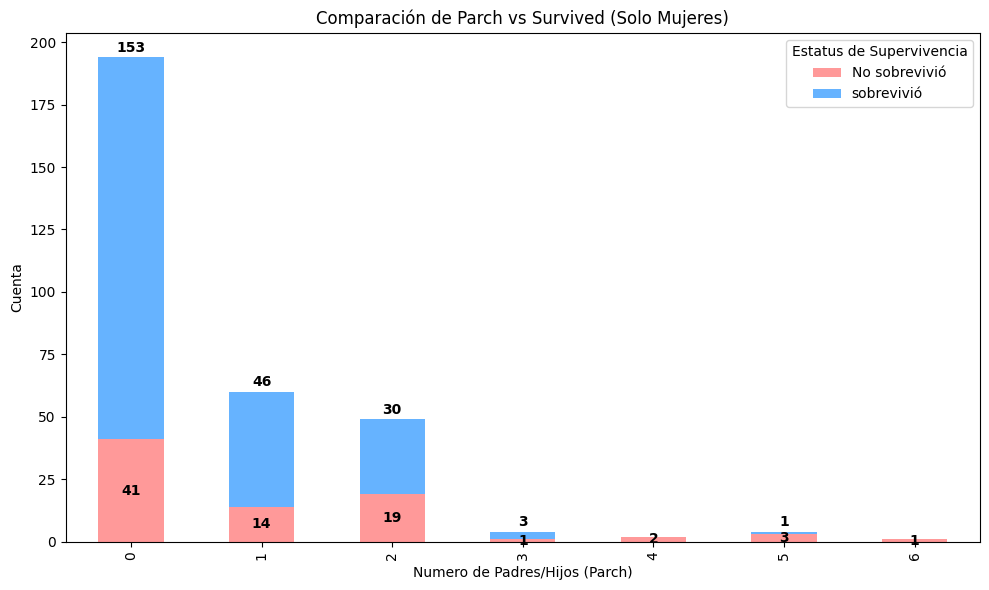

Tabla de comparación entre 'parch' y 'Survived' (solo mujeres):
Survived   0    1  % Not Survived  % Survived
Parch                                        
0         41  153            21.1        78.9
1         14   46            23.3        76.7
2         19   30            38.8        61.2
3          1    3            25.0        75.0
4          2    0           100.0         0.0
5          3    1            75.0        25.0
6          1    0           100.0         0.0


In [19]:
# Filtra solo a las mujeres
df_women = df[df['Sex'] == 0]

# Agrupa por 'Parch' y 'Survived' para contar los valores en el DataFrame filtrado
parch_survived_women = df_women.groupby(['Parch', 'Survived']).size().unstack(fill_value=0)

# Calcula el total de mujeres para cada valor de 'Parch'
total_parch = parch_survived_women.sum(axis=1)

# Calcula el porcentaje de supervivencia y no supervivencia
parch_survived_women['% Not Survived'] = (parch_survived_women[0] / total_parch * 100).round(1)
parch_survived_women['% Survived'] = (parch_survived_women[1] / total_parch * 100).round(1)

# Crea el gráfico de barras
ax = parch_survived_women[[0,1]].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])

# Configura el título y las etiquetas
plt.title('Comparación de Parch vs Survived (Solo Mujeres)')
plt.xlabel('Numero de Padres/Hijos (Parch)')
plt.ylabel('Cuenta')
plt.legend(['No sobrevivió', 'sobrevivió'], title='Estatus de Supervivencia')

# Añade las etiquetas con las cantidades sobre cada barra, excepto cuando el valor es 0
for p in ax.patches:
    height = p.get_height()

    if height > 0:  # Solo añade la anotación si el valor es mayor que 0
        width = p.get_width()
        x, y = p.get_xy()

        if y > 0:
            ax.annotate(f'{int(height)}', (x + width / 2, y + height + 1),
                        ha='center', va='bottom', fontsize=10, color='black', weight='bold')
        else:
            ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2),
                        ha='center', va='center', fontsize=10, color='black', weight='bold')

# Muestra el gráfico
plt.tight_layout()
plt.show()

# Imprimir los valores en una tabla
print("Tabla de comparación entre 'parch' y 'Survived' (solo mujeres):")
print(parch_survived_women)

## Embarked/Survived

Se decidió realizar un gráfico pastel que muestra la distribución entre las tres ciudades de embarque y la tasa de supervivencia por cada una, buscando algúna correlación que pudiera mostrar relevancia en los datos. El gráfico se puede ver a continuación.

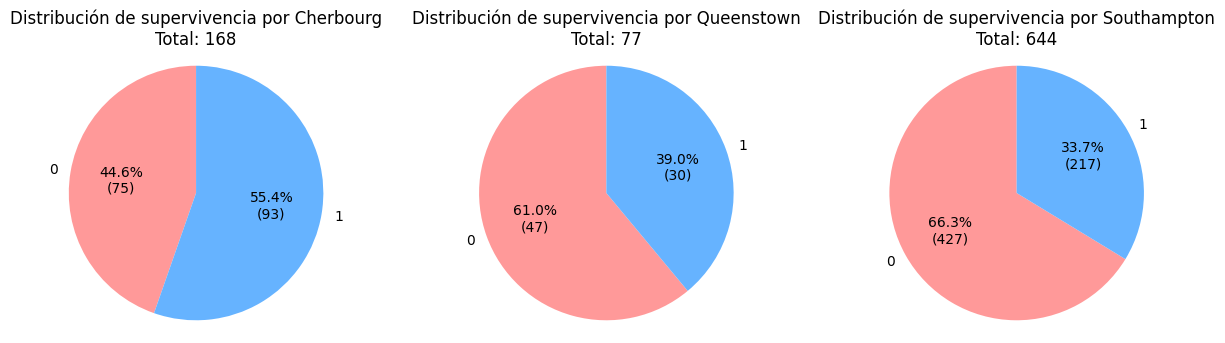

In [20]:
# Guarda los valores numéricos originales en una nueva columna temporal
df['Embarked_original'] = df['Embarked']

# Map inverso para convertir de números a nombres de ciudades
city_map = {0: 'Southampton', 1: 'Cherbourg', 2: 'Queenstown'}
df['Embarked'] = df['Embarked'].map(city_map)

# Agrupamos por 'Embarked' y 'Survived' para contar los valores
embarked_survived = df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

# Función para agregar porcentaje y cantidad
def func(pct, allvalues):
    absolute = int(round(pct/100.*sum(allvalues)))
    return f"{pct:.1f}%\n({absolute})"

# Configuramos el número de columnas y filas
num_ports = len(embarked_survived.index)
fig, axes = plt.subplots(nrows=(num_ports + 1) // 2, ncols=3, figsize=(15, 8))

# Aplanamos la matriz de ejes para iterar fácilmente
axes = axes.flatten()

# Hacemos la gráfica de pie para cada puerto de embarque
for i, port in enumerate(embarked_survived.index):
    values = embarked_survived.loc[port]
    if values.sum() > 0:  # Verifica que haya datos para graficar
        axes[i].pie(values,
                labels=values.index,
                autopct=lambda pct: func(pct, values),
                startangle=90,
                colors=['#ff9999', '#66b3ff'])
        total = values.sum()
        axes[i].set_title(f'Distribución de supervivencia por {port}\nTotal: {total}')
        axes[i].axis('equal')
    else:
        axes[i].set_visible(False)  # Oculta el subplot si no hay datos

# Elimina gráficos no utilizados si el número de puertos es impar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Vuelve a asignar los valores numéricos originales a la columna 'Embarked'
df['Embarked'] = df['Embarked_original']

# Elimina la columna temporal 'Embarked_original'
df.drop(columns=['Embarked_original'], inplace=True)

---
Como se puede observar, los resultados indicaron una diferencia insignificante para la embarcación en ‘Cherbourg’ siendo una proporción de 45 contra 55 en porcentaje, en cambio para las ciudades de ‘Queenstown’ y ‘Southampton’ la proporción de supervivencia era 1 a 3, indicando que una de cada tres personas sobrevivió, convirtiendo este feature en uno relevante porque en estas ciudades embarcó la mayor parte de los tripulantes, siendo Southampton la principal con 644 de los 889 pasajeros del dataset.

Ahora, existe una duda latente en la interpretación de estos gráficos y es que existe la posibilidad de que estemos se esté encontrando una aparente relación entre la ciudad de embarque y la tasa de supervivencia que puede estar dado por otro feature. Para descartar lo anterior, se decidió realizar la misma comparación pero esta vez separado por sexo, esperando ver si el patrón se repetía, lo cual indicaría que la relevancia real está en el sexo y no en la ciudad de embarque.


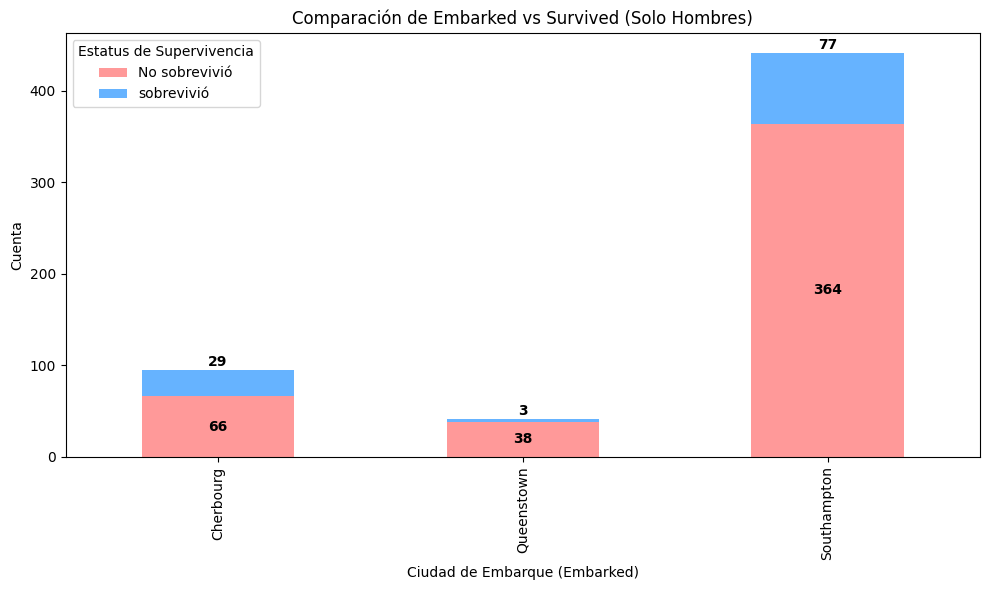

Tabla de comparación entre 'Embarked' y 'Survived' (solo hombres):
Survived       0   1  % Not Survived  % Survived
Embarked                                        
Cherbourg     66  29            69.5        30.5
Queenstown    38   3            92.7         7.3
Southampton  364  77            82.5        17.5


In [21]:
# Guarda los valores numéricos originales en una nueva columna temporal
df['Embarked_original'] = df['Embarked']

# Map inverso para convertir de números a nombres de ciudades
city_map = {0: 'Southampton', 1: 'Cherbourg', 2: 'Queenstown'}
df['Embarked'] = df['Embarked'].map(city_map)

# Filtra solo a los hombres
df_men = df[df['Sex'] == 1]

# Agrupa por 'Embarked' y 'Survived' para contar los valores en el DataFrame filtrado
embarked_survived_men = df_men.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

# Calcula el total de hombres para cada valor de 'Embarked'
total_sibsp = embarked_survived_men.sum(axis=1)

# Calcula el porcentaje de supervivencia y no supervivencia
embarked_survived_men['% Not Survived'] = (embarked_survived_men[0] / total_sibsp * 100).round(1)
embarked_survived_men['% Survived'] = (embarked_survived_men[1] / total_sibsp * 100).round(1)

# Crea el gráfico de barras
ax = embarked_survived_men[[0,1]].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])

# Configura el título y las etiquetas
plt.title('Comparación de Embarked vs Survived (Solo Hombres)')
plt.xlabel('Ciudad de Embarque (Embarked)')
plt.ylabel('Cuenta')
plt.legend(['No sobrevivió', 'sobrevivió'], title='Estatus de Supervivencia')

# Añade las etiquetas con las cantidades sobre cada barra, excepto cuando el valor es 0
for p in ax.patches:
    height = p.get_height()

    if height > 0:  # Solo añade la anotación si el valor es mayor que 0
        width = p.get_width()
        x, y = p.get_xy()

        if y > 0:
            ax.annotate(f'{int(height)}', (x + width / 2, y + height + 1),
                        ha='center', va='bottom', fontsize=10, color='black', weight='bold')
        else:
            ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2),
                        ha='center', va='center', fontsize=10, color='black', weight='bold')

# Muestra el gráfico
plt.tight_layout()
plt.show()

# Imprimir los valores en una tabla
print("Tabla de comparación entre 'Embarked' y 'Survived' (solo hombres):")
print(embarked_survived_men)

# Vuelve a asignar los valores numéricos originales a la columna 'Embarked'
df['Embarked'] = df['Embarked_original']

# Elimina la columna temporal 'Embarked_original'
df.drop(columns=['Embarked_original'], inplace=True)

---
Gráfico de barras para comparar cada valor del feature "Embarked" con el label "Survived" aplicado sólo a mujeres.

En este gráfico se busca lo mismo que en el anterior, pero ahora aplicado para las mujeres.

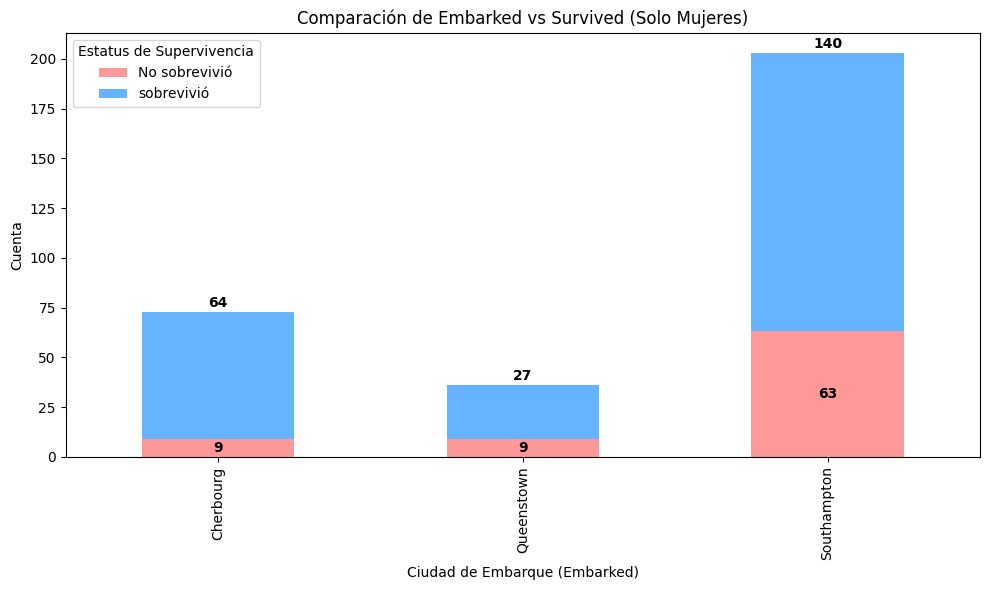

Tabla de comparación entre 'Embarked' y 'Survived' (solo mujeres):
Survived      0    1  % Not Survived  % Survived
Embarked                                        
Cherbourg     9   64            12.3        87.7
Queenstown    9   27            25.0        75.0
Southampton  63  140            31.0        69.0


In [22]:
# Guarda los valores numéricos originales en una nueva columna temporal
df['Embarked_original'] = df['Embarked']

# Map inverso para convertir de números a nombres de ciudades
city_map = {0: 'Southampton', 1: 'Cherbourg', 2: 'Queenstown'}
df['Embarked'] = df['Embarked'].map(city_map)

# Filtra solo a las mujeres
df_women = df[df['Sex'] == 0]

# Agrupa por 'Embarked' y 'Survived' para contar los valores en el DataFrame filtrado
embarked_survived_women = df_women.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

# Calcula el total de hombres para cada valor de 'Embarked'
total_embarked = embarked_survived_women.sum(axis=1)

# Calcula el porcentaje de supervivencia y no supervivencia
embarked_survived_women['% Not Survived'] = (embarked_survived_women[0] / total_embarked * 100).round(1)
embarked_survived_women['% Survived'] = (embarked_survived_women[1] / total_embarked * 100).round(1)

# Crea el gráfico de barras
ax = embarked_survived_women[[0,1]].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])

# Configura el título y las etiquetas
plt.title('Comparación de Embarked vs Survived (Solo Mujeres)')
plt.xlabel('Ciudad de Embarque (Embarked)')
plt.ylabel('Cuenta')
plt.legend(['No sobrevivió', 'sobrevivió'], title='Estatus de Supervivencia')

# Añade las etiquetas con las cantidades sobre cada barra, excepto cuando el valor es 0
for p in ax.patches:
    height = p.get_height()

    if height > 0:  # Solo añade la anotación si el valor es mayor que 0
        width = p.get_width()
        x, y = p.get_xy()

        if y > 0:
            ax.annotate(f'{int(height)}', (x + width / 2, y + height + 1),
                        ha='center', va='bottom', fontsize=10, color='black', weight='bold')
        else:
            ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2),
                        ha='center', va='center', fontsize=10, color='black', weight='bold')

# Muestra el gráfico
plt.tight_layout()
plt.show()

# Imprimir los valores en una tabla
print("Tabla de comparación entre 'Embarked' y 'Survived' (solo mujeres):")
print(embarked_survived_women)

# Vuelve a asignar los valores numéricos originales a la columna 'Embarked'
df['Embarked'] = df['Embarked_original']

# Elimina la columna temporal 'Embarked_original'
df.drop(columns=['Embarked_original'], inplace=True)

# Camino al Dataset final

## Llenar 'Age' y 'Embarked' faltantes

In [23]:
"""
Mr. (1) 18 < años < 70 años (hombre adulto)
Mrs. (2) 18 < años < 55 (mujer casada)
Miss (3) 0 < años < 50 (mujer soltera)
Master (4) 0 < años < 8 (niño)
"""
import os

# Agrupa por 'TitleNumber' y calcula el promedio y desviación estándar de la columna 'Age'
age_statistics = df.groupby('TitleNumber')['Age'].agg(['mean', 'std'])

# Convierte los resultados a enteros
age_statistics = age_statistics.astype(int)

# Rellena los valores nulos en la columna 'Age'
def assign_age(row):
    if np.isnan(row['Age']):
        mean_age = age_statistics.loc[row['TitleNumber'], 'mean']
        std_age = age_statistics.loc[row['TitleNumber'], 'std']
        return np.random.randint(mean_age - std_age, mean_age + std_age + 1)
    else:
        return row['Age']

# Aplica la función para llenar los valores nulos en la columna 'Age'
df['Age'] = df.apply(assign_age, axis=1)

# Rellena los valores faltantes en la columna 'Embarked' con el número 2
df['Embarked'].fillna(2, inplace=True)

# Define el nombre base del archivo
base_filename = 'train_filled.csv'
filename = base_filename

# Verifica si el archivo ya existe y crea un nombre único
counter = 1
while os.path.exists(filename):
    filename = f'train_filled_{counter}.csv'
    counter += 1

# Guarda el DataFrame actualizado en el nuevo archivo .csv
df.to_csv(filename, index=False)

print(f"Nuevo 'train_filled.csv' guardado con éxito como '{filename}'.")

Nuevo 'train_filled.csv' guardado con éxito como 'train_filled_1.csv'.


## Eliminar features no relevantes


El dataset contiene varios features no relevante para el análisis que se realizará.

El primero es es el passengerId, cuya única función es identificar a las personas del mismo dataset.


El segundo es el ticket. Existen un total de 681 tickets únicos en el dataset, pero esta feature contiene un total de 891 instancias. Se analizó más a fondo y se encontró que los tickets faltantes son sólo tickets que identifican a grupos de personas, generalmente familias o parejas. Por lo anterior, se puede concluir que esta feature tiene, prácticamente, la misma función que el passengerId: identificar a las personas que abordaron el Titanic.

Finalmente, Fare, que representa el costo del boleto, está estrechamente relacionada con la feature de Pclass, la cuál indica la clase del boleto. Dado que usar ambos datos era redundante, decidimos conservar únicamente la columna Pclass y descartar el feature de fare.

Adicionalmente, se eliminaron aquellas features que ya cumplieron su función al momento de ayudar en el llenado de datos, como lo son Name, Title y TitleNumber.


In [24]:
# Lee el archivo CSV con los datos 'Age' y 'Embarked' llenados
df = pd.read_csv('train_filled.csv')

# Elimina las columnas especificadas
columns_to_remove = ['PassengerId', 'Name', 'Ticket', 'Fare', 'Title', 'TitleNumber']
df_cleaned = df.drop(columns=columns_to_remove)

# Define el nombre base del archivo
base_filename = 'train_cleaned.csv'
filename = base_filename

# Verifica si el archivo ya existe y crea un nombre único
counter = 1
while os.path.exists(filename):
    filename = f'train_cleaned_{counter}.csv'
    counter += 1

# Guarda el DataFrame limpio en el nuevo archivo .csv
df_cleaned.to_csv(filename, index=False)

print(f"Nuevo 'train_cleaned.csv' guardado con éxito como '{filename}'.")

Nuevo 'train_cleaned.csv' guardado con éxito como 'train_cleaned_1.csv'.


In [25]:
# Pruebas

# print(age_statistics)

# Filtra las filas donde 'TitleNumber' es 3 y selecciona las 10 edades más altas
# top_10_max_ages_category_3 = df[df['TitleNumber'] == 3]['Age'].nlargest(10)

# Muestra el resultado
# print("Las 10 edades máximas de la categoría 3 son:")
# print(top_10_max_ages_category_3)